In [1]:
from pandas_datareader import data
import datetime

today = datetime.date.today()
start_date = str(today - datetime.timedelta(1000))
end_date = str(today)

panel_data = data.DataReader('AAPL', 'yahoo', start_date, end_date)
panel_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-28,51.430000,50.830002,51.025002,51.382500,63755200.0,50.340683
2019-08-29,52.330002,51.665001,52.125000,52.252499,83962000.0,51.193043
2019-08-30,52.612499,51.799999,52.540001,52.185001,84573600.0,51.126915
2019-09-03,51.744999,51.055000,51.607498,51.424999,80092000.0,50.382324
2019-09-04,52.369999,51.830002,52.097500,52.297501,76752400.0,51.237133
...,...,...,...,...,...,...
2022-05-17,149.770004,146.679993,148.860001,149.240005,78336300.0,149.240005
2022-05-18,147.360001,139.899994,146.850006,140.820007,109742900.0,140.820007
2022-05-19,141.660004,136.600006,139.880005,137.350006,136095600.0,137.350006


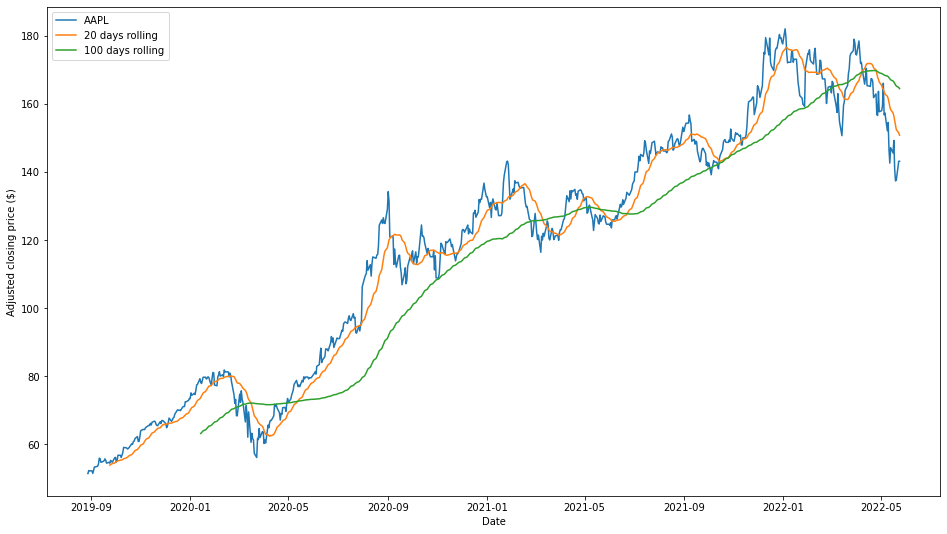

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

close = panel_data['Close']

all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

close = close.reindex(all_weekdays)

close = close.fillna(method='ffill')

short_rolling_msft = close.rolling(window=20).mean()
long_rolling_msft = close.rolling(window=100).mean()

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label='AAPL')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

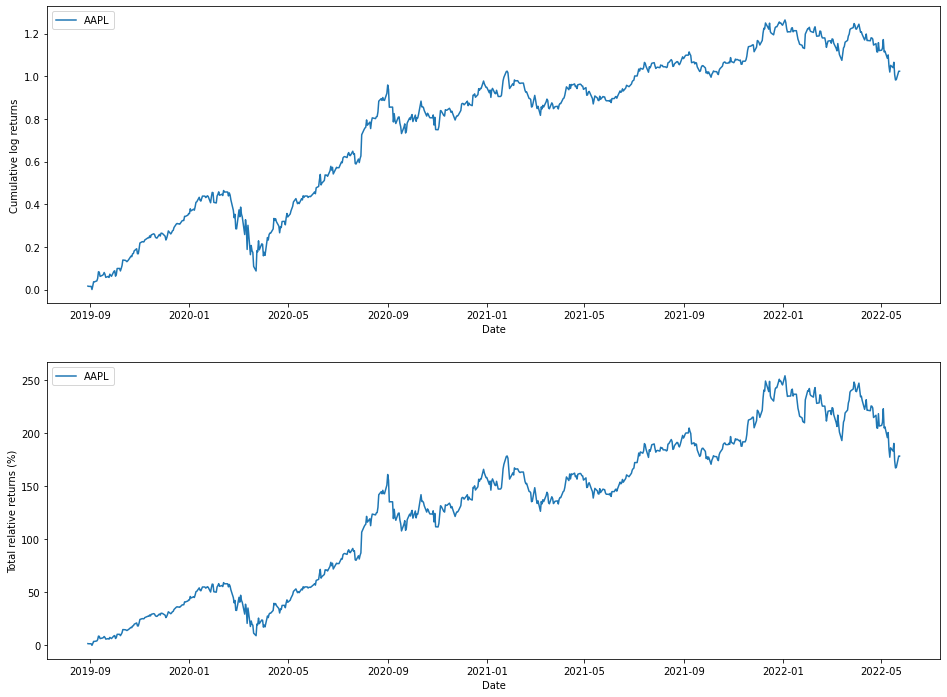

In [9]:
import numpy as np

log_returns = np.log(close).diff()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

ax1.plot(log_returns.index, log_returns.cumsum(), label='AAPL')
    
ax1.set_ylabel('Cumulative log returns')
ax1.set_xlabel('Date')
ax1.legend(loc='upper left')

ax2.plot(log_returns.index, 100*(np.exp(log_returns.cumsum()) - 1), label='AAPL')
    
ax2.set_ylabel('Total relative returns (%)')
ax2.set_xlabel('Date')
ax2.legend(loc='upper left')

plt.show()

In [11]:
days = 1000
years = days / 365

final_returns = 100*(np.exp(log_returns.cumsum()) - 1)[-1]

print('Return from start date to end date is: ' + '{:.2f}'.format(final_returns) + '%')

final_returns_per_year = final_returns / years

print('Average yearly return: ' + '{:.2f}'.format(final_returns_per_year) + '%')

Return from start date to end date is: 178.52%
Average yearly return: 65.16%


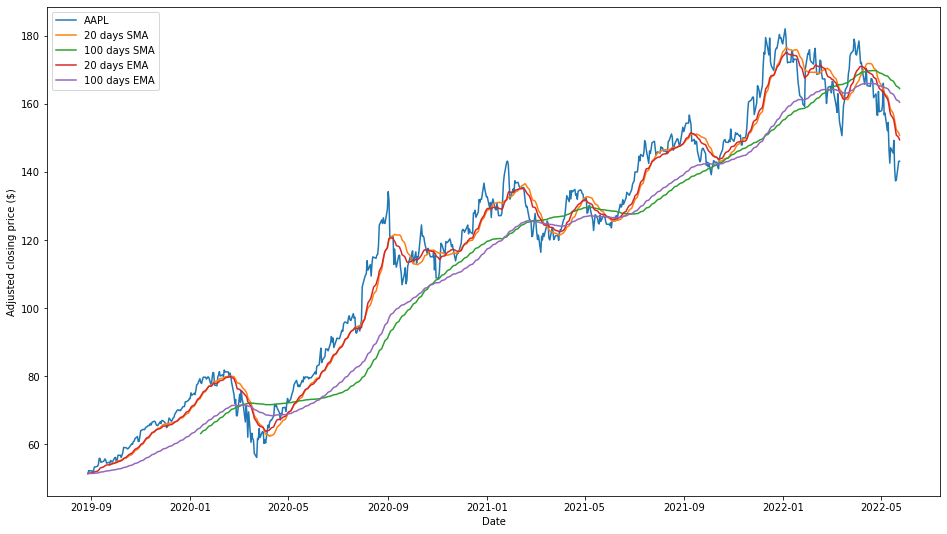

In [14]:
ema_short = close.ewm(span = 20, adjust=False).mean()
ema_long = close.ewm(span = 100, adjust=False).mean()

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label='AAPL')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days SMA')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days SMA')
ax.plot(ema_short.index, ema_short, label="20 days EMA")
ax.plot(ema_long.index, ema_long, label="100 days EMA")

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()